# Xopt Parallel Examples

Xopt provides methods to parallelize optimizations using Processes, Threads, MPI, and Dask using the `concurrent.futures` interface as defined in  https://www.python.org/dev/peps/pep-3148/ .

In [1]:
# Import the class
from xopt import Xopt

# Notebook printing output
# from xopt import output_notebook
# output_notebook()

In [2]:
!mkdir temp

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [3]:
# Make a proper input file.
YAML = """
xopt:
  output_path: temp
  

algorithm:
  name: cnsga
  options:
    max_generations: 5
    population_size:  128
    show_progress: True
  
simulation: 
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  
vocs:
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

"""

# Processes

In [4]:
from concurrent.futures import ProcessPoolExecutor

In [5]:
X = Xopt(YAML)

In [6]:
with ProcessPoolExecutor() as executor:
    X.run(executor=executor)

  0%|          | 0/128 [00:00<?, ?it/s]

Generation 0:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 1:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 2:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 3:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 4:   0%|          | 0/128 [00:00<?, ?it/s]

# Threads

Continue running, this time with threads.

In [7]:
from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor() as executor:
    X.run(executor=executor)

  0%|          | 0/128 [00:00<?, ?it/s]

Generation 6:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 7:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 8:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 9:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 10:   0%|          | 0/128 [00:00<?, ?it/s]

# MPI 

The `test.yaml` file completely defines the problem. We will also direct the logging to an `xopt.log` file. The following invocation recruits 4 MPI workers to solve this problem.

We can also continue by calling `.save` with a JSON filename. This will write all of previous results into the file.

In [8]:
# Write YAML text to a file
# open('test.yaml', 'w').write(YAML)

X.save("test.json")

In [9]:
!mpirun -n 4 python -m mpi4py.futures -m xopt.mpi.run -vv --logfile xopt.log test.json

Namespace(input_file='test.json', logfile='xopt.log', verbose=2)
Parallel execution with 4 workers
Loading from JSON file: test.json
Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.
Specified both known algorithm `cnsga` and `function`. Using known algorithm function.
Starting at time 2021-10-08T13:13:09-07:00

    
    
     ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
    ▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
    ▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
    ▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
    ▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
    ░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
      ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
    ░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
    ░ ░               ░       ░        ░       ░  ░
    ░                                              
    
    
    Continuous Non-dominated Sorting Genetic Algorithm
    Version 0.4.3+219.gfff1660.dirty


# Dask



In [10]:
from dask.distributed import Client

In [11]:
with Client() as executor:
    X.run(executor=executor)

  0%|          | 0/128 [00:00<?, ?it/s]

Generation 12:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 13:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 14:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 15:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 16:   0%|          | 0/128 [00:00<?, ?it/s]

# Load output into Pandas

This algorithm writes two types of files: `gen_{i}.json` with all of the new individuals evaluated in a generation, and `pop_{i}.json` with the latest best population. Xopt provides some functions to load these easily into a Pandas dataframe for further analysis.

In [12]:
from xopt.dataset import load_all_xopt_data
from glob import glob

%config InlineBackend.figure_format = 'retina'

In [13]:
# Get a list of all of the gen files
genfiles = glob("temp/gen_*json")

In [14]:
df = load_all_xopt_data(genfiles)
df

,x1,x2,a,x9,y1,y2,c1,c2,some_array,feasible
0,0.760804,1.122256,dummy_constant,0.760804,0.760804,1.122256,0.937706,0.455221,"[1, 2, 3]",True
1,0.379568,0.457559,dummy_constant,0.379568,0.379568,0.457559,-0.655003,0.016305,"[1, 2, 3]",False
2,0.583654,1.156220,dummy_constant,0.583654,0.583654,1.156220,0.640929,0.437623,"[1, 2, 3]",True
3,1.150773,0.366553,dummy_constant,1.150773,1.150773,0.366553,0.436672,0.441313,"[1, 2, 3]",True
4,0.437397,1.424365,dummy_constant,0.437397,0.437397,1.424365,1.214668,0.858370,"[1, 2, 3]",False
...,...,...,...,...,...,...,...,...,...,...
1918,1.124420,0.222109,dummy_constant,1.124420,1.124420,0.222109,0.413631,0.467124,"[1, 2, 3]",True
1919,0.611591,0.776722,dummy_constant,0.611591,0.611591,0.776722,0.009120,0.089028,"[1, 2, 3]",True
1920,1.200823,1.160856,dummy_constant,1.200823,1.200823,1.160856,1.693204,0.927883,"[1, 2, 3]",False
1921,0.340896,1.128858,dummy_constant,0.340896,0.340896,1.128858,0.392529,0.420776,"[1, 2, 3]",True


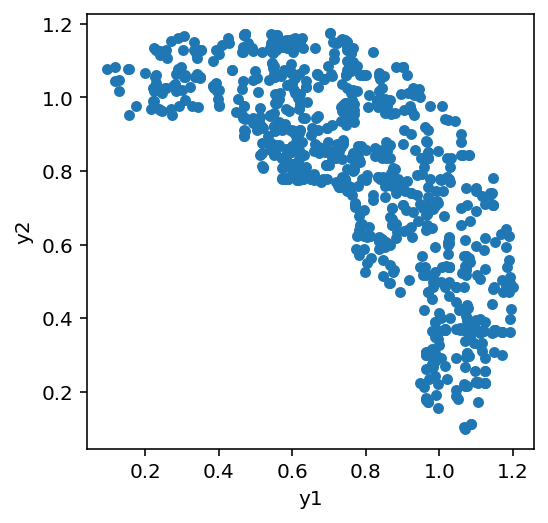

In [15]:
# Plot the feasible ones
feasible_df = df[df["feasible"]]
feasible_df.plot("y1", "y2", kind="scatter").set_aspect("equal")

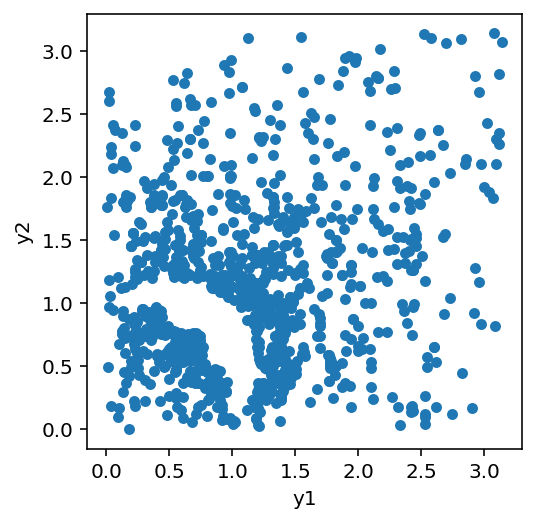

In [16]:
# Plot the infeasible ones
infeasible_df = df[~df["feasible"]]
infeasible_df.plot("y1", "y2", kind="scatter").set_aspect("equal")

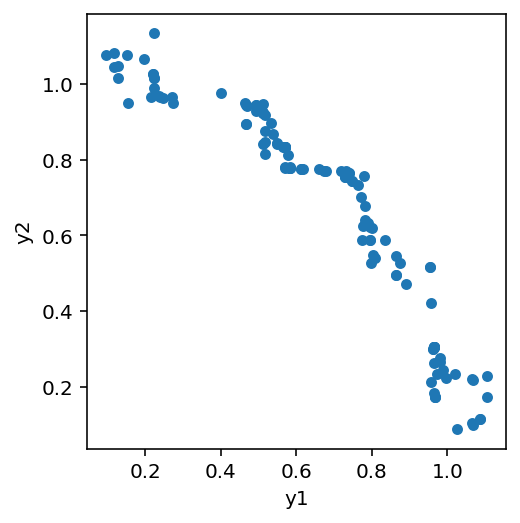

In [17]:
# This is the final population
df1 = load_all_xopt_data(["temp/pop_17.json"])
df1.plot("y1", "y2", kind="scatter").set_aspect("equal")

# matplotlib plotting

You can always use matplotlib for customizable plotting

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

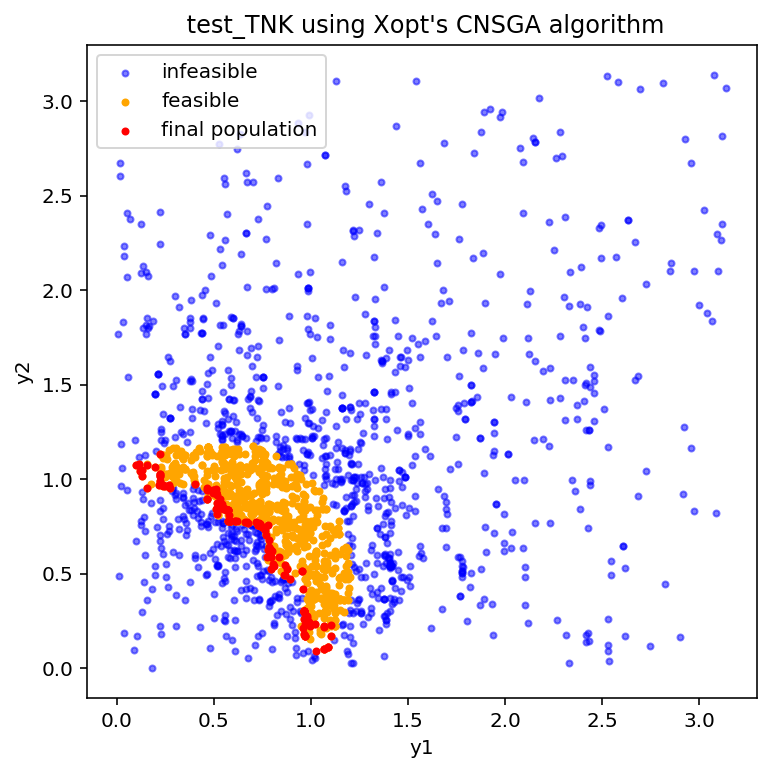

In [19]:
# Extract objectives from output
k1, k2 = "y1", "y2"

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(
    infeasible_df[k1],
    infeasible_df[k2],
    color="blue",
    marker=".",
    alpha=0.5,
    label="infeasible",
)
ax.scatter(
    feasible_df[k1], feasible_df[k2], color="orange", marker=".", label="feasible"
)
ax.scatter(df1[k1], df1[k2], color="red", marker=".", label="final population")
ax.set_xlabel(k1)
ax.set_ylabel(k2)
ax.set_aspect("auto")
ax.set_title(f" {X.simulation['name']} using Xopt's CNSGA algorithm")
plt.legend()

In [20]:
# Cleanup
!rm -r dask-worker-space
!rm -r temp
!rm xopt.log
!rm test.json